In [1]:
import os
os.chdir("C:\\Users\\Adhvaidh\\Downloads")

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [89]:
ds=pd.read_csv("GBP_USD Historical Data (2).csv")

In [90]:
ds=ds.tail(365)

In [91]:
ds.head()

,DATE,CLOSE
1635,03-Jan-19,1.13935
1636,04-Jan-19,1.13942
1637,07-Jan-19,1.14752
1638,08-Jan-19,1.14390
1639,09-Jan-19,1.15460


In [92]:
ds['DATE']=pd.to_datetime(ds['DATE'])

In [93]:
ds.head()

,DATE,CLOSE
1635,2019-01-03,1.13935
1636,2019-01-04,1.13942
1637,2019-01-07,1.14752
1638,2019-01-08,1.14390
1639,2019-01-09,1.15460


In [94]:
ds.set_index('DATE', inplace=True)

In [95]:
ds.head()

,CLOSE
DATE,
2019-01-03,1.13935
2019-01-04,1.13942
2019-01-07,1.14752
2019-01-08,1.14390
2019-01-09,1.15460


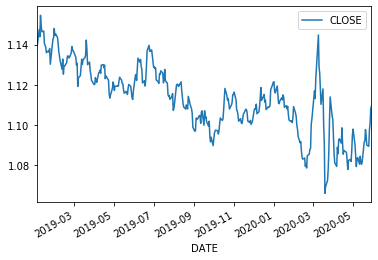

In [96]:
ds.plot()

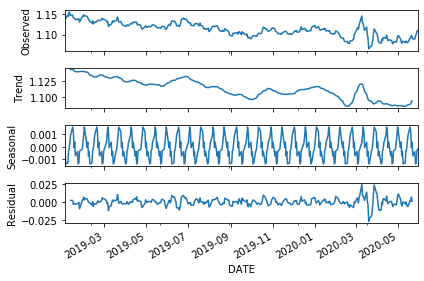

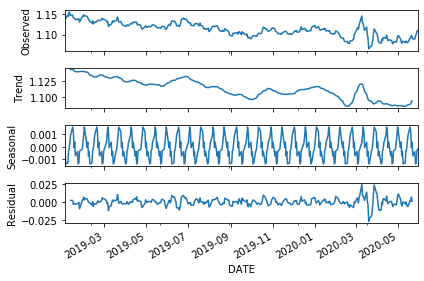

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(ds['CLOSE'], freq=12)  
decomp.plot()

In [98]:
from statsmodels.tsa.stattools import adfuller
adfuller(ds['CLOSE'])

(-2.4025789729343767,
 0.14100983532026612,
 8,
 356,
 {'1%': -3.448853029339765,
  '5%': -2.869693115704379,
  '10%': -2.571113512498422},
 -2795.9862309702544)

In [99]:
def adf_chec(time_series):
    result=adfuller(time_series)
    print("Augmented Dickey fuller test")
    labels=['ADF Test Statistic', 'P-value', '#Lags', 'No of obs.']
    for value, label in zip(result, labels):
        print(label + ':' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against null hypothesis, timeseries is stationery')
    else: 
        print('Weak evidence against null hypothesis, timeseries is non-stationery')

In [100]:
adf_chec(ds['CLOSE'])

Augmented Dickey fuller test
ADF Test Statistic:-2.4025789729343767
P-value:0.14100983532026612
#Lags:8
No of obs.:356
Weak evidence against null hypothesis, timeseries is non-stationery


In [101]:
ds['Price First Diff']=ds['CLOSE']-ds['CLOSE'].shift(1)  

In [102]:
ds.head()

,CLOSE,Price First Diff
DATE,,
2019-01-03,1.13935,NaN
2019-01-04,1.13942,0.00007
2019-01-07,1.14752,0.00810
2019-01-08,1.14390,-0.00362
2019-01-09,1.15460,0.01070


In [103]:
adf_chec(ds['Price First Diff'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-9.080495611340032
P-value:4.068609617688701e-15
#Lags:7
No of obs.:356
Strong evidence against null hypothesis, timeseries is stationery


In [104]:
#p=0;d=1;q=0

In [105]:
ds['Seasonal Difference']=ds['CLOSE']-ds['CLOSE'].shift(12)  

In [106]:
ds.head()

,CLOSE,Price First Diff,Seasonal Difference
DATE,,,
2019-01-03,1.13935,NaN,NaN
2019-01-04,1.13942,0.00007,NaN
2019-01-07,1.14752,0.00810,NaN
2019-01-08,1.14390,-0.00362,NaN
2019-01-09,1.15460,0.01070,NaN


In [107]:
adf_chec(ds['Seasonal Difference'].dropna())

Augmented Dickey fuller test
ADF Test Statistic:-4.480039475199892
P-value:0.00021363144802972624
#Lags:14
No of obs.:338
Strong evidence against null hypothesis, timeseries is stationery


In [108]:
#d=1, D=0

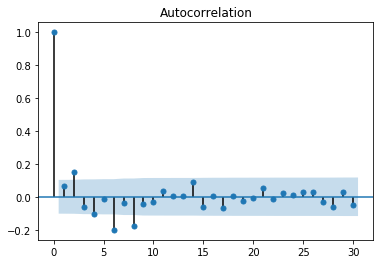

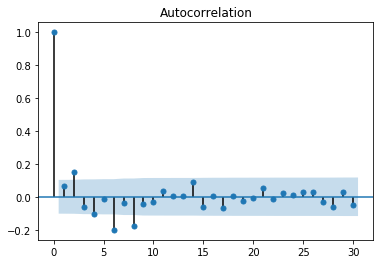

In [109]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ds['Price First Diff'].dropna(), lags=30)

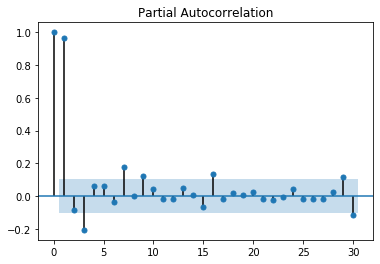

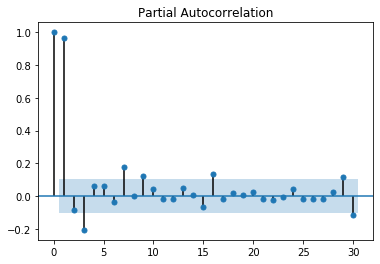

In [110]:
#q=1
plot_pacf(ds['CLOSE'].dropna(), lags=30)
#p=1

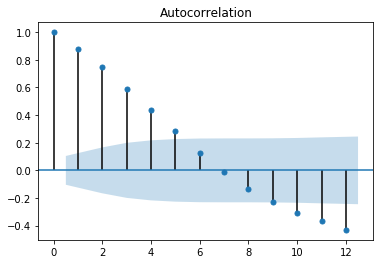

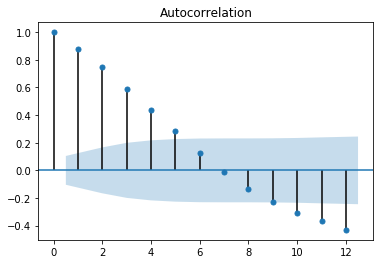

In [111]:
plot_acf(ds['Seasonal Difference'].dropna(), lags=12) #Q=6

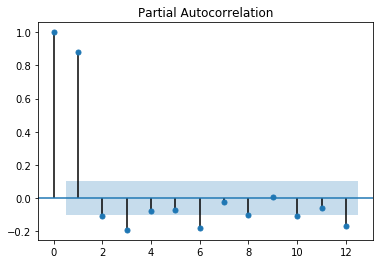

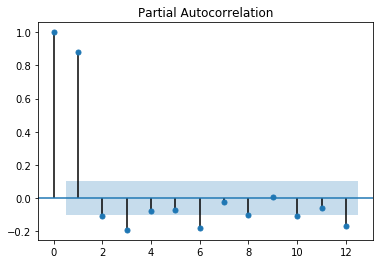

In [112]:
plot_pacf(ds['Seasonal Difference'].dropna(), lags=12) #P=1

In [113]:
#Finally,       AR  I  MA
#      TREND :  1   1  1

#SEASONALITY :  1  0   6


In [117]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ds['CLOSE'],order=(1,1,1), seasonal_order=(1,1,1,1))
results=model.fit()


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


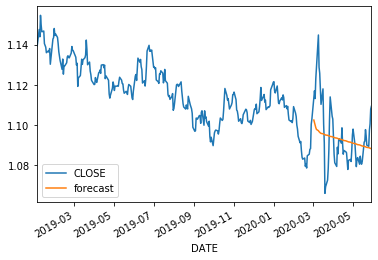

In [119]:
ds['forecast']=results.predict(start=300, end=364, dynamic=True)
ds[['CLOSE','forecast']].plot()

In [120]:
from pandas.tseries.offsets import DateOffset
future_dates=[ds.index[-1]+ DateOffset(days=x) for x in range(0,365)]

In [121]:
future_dates_df_1=pd.DataFrame(index=future_dates[1:], columns=ds.columns)
future_df_1=pd.concat([ds,future_dates_df_1])

In [122]:
future_dates_df_1

,CLOSE,Price First Diff,Seasonal Difference,forecast
2020-05-30,NaN,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN
2020-06-02,NaN,NaN,NaN,NaN
2020-06-03,NaN,NaN,NaN,NaN
2020-06-04,NaN,NaN,NaN,NaN
2020-06-05,NaN,NaN,NaN,NaN
2020-06-06,NaN,NaN,NaN,NaN
2020-06-07,NaN,NaN,NaN,NaN
2020-06-08,NaN,NaN,NaN,NaN


C:\Users\Adhvaidh\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


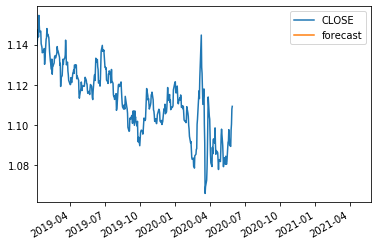

In [124]:
future_df_1['forecast']=results.predict(start=365, end=729, dynamic=True)
future_df_1[['CLOSE','forecast']].plot()

In [83]:
future_df_1.tail(30)

,CLOSE,Seasonal Difference,forecast
2020-05-29,1.10933,0.02777,NaN
2020-05-30,NaN,NaN,NaN
2020-05-31,NaN,NaN,NaN
2020-06-01,NaN,NaN,1.108475
2020-06-02,NaN,NaN,1.111190
2020-06-03,NaN,NaN,1.120212
2020-06-04,NaN,NaN,1.121590
2020-06-05,NaN,NaN,1.122406
2020-06-06,NaN,NaN,NaN
2020-06-07,NaN,NaN,NaN


In [ ]:
future_df_2=future_df_1.drop(['Price','Price First Diff','Seasonal Difference'],axis=1)

In [ ]:
future_df_2=future_df_2.tail(-1565)

In [125]:
future_df_2.to_excel(r'C:\Users\Adhvaidh\Desktop\MARKETS\USD INR Prediction\US THB Prediction 29 MAY.xlsx')

NameError: name 'future_df_2' is not defined